### Ансамблевая классификация

1. Разработайте программу, которая выполняет классификацию заданного набора данных с помощью одной из техник ансамблевой классификации. Параметрами программы являются набор данных, ансамблевая техника (бэггинг, случайный лес или бустинг), количество участников ансамбля, а также параметры в соответствии с выбранной техникой ансамблевой классификации.
2. Проведите эксперименты на наборе данных из задания Классификация с помощью дерева решений, варьируя количество участников ансамбля (от 50 до 100 с шагом 10).
3. Выполните визуализацию полученных результатов в виде следующих диаграмм: показатели качества классификации в зависимости от количества участников ансамбля для заданного набора данных; нанесите на диаграмму соответствующие значения, полученные в задании Классификация с помощью дерева решений.

In [8]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler, ADASYN

import matplotlib.pyplot as plt
import graphviz
import seaborn as sns

In [9]:
train_df = pd.read_csv("train.csv", header = None, na_values = [" ?"])
test_df = pd.read_csv("test.csv", header = None, na_values = [" ?"])
train_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [10]:
columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain",
          "capital-loss", "hours-per-week", "native-country", "income"]

train_df.columns = columns
test_df.columns = columns

test_df["income"] = test_df["income"].str.replace(".", "", regex = False) # точка - не означает реагулярное выражение!

df = pd.concat([train_df, test_df])
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
16277,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [11]:
# Заполнение пропущенных значений модой (самым частым значением)
for col in df.columns:
    if df[col].isna().sum() > 0:
        df[col] = df[col].fillna(df[col].mode()[0])

print(df["income"].value_counts())

income
<=50K    37155
>50K     11687
Name: count, dtype: int64


In [12]:
categorical_columns = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "sex", "native-country", "income"]
df_encoded = df.copy()
for col in categorical_columns:
    df_encoded[col] = LabelEncoder().fit_transform(df[col])
df_encoded

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,3,215419,9,13,0,9,1,4,0,0,0,36,38,0
16277,64,3,321403,11,9,6,9,2,2,1,0,0,40,38,0
16278,38,3,374983,9,13,2,9,0,4,1,0,0,50,38,0
16279,44,3,83891,9,13,0,0,3,1,1,5455,0,40,38,0


До увеличения количества экземляров
income
0    37155
1    11687
Name: count, dtype: int64
После увеличения количества экзмепляров
income
0    37155
1    37155
Name: count, dtype: int64


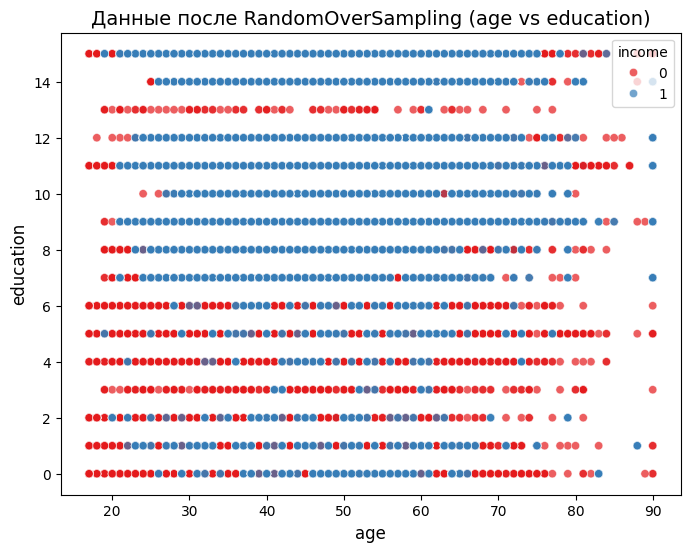

In [13]:
X = df_encoded.drop('income', axis = 1) # Среди столбцов
Y = df_encoded['income']

ros = RandomOverSampler(random_state = 23)
X_resampled, y_resampled = ros.fit_resample(X, Y)
X_resampled['income'] = y_resampled
df_balanced = X_resampled.copy()

print('До увеличения количества экземляров')
print(Y.value_counts())
print('После увеличения количества экзмепляров')
print(y_resampled.value_counts())

plt.figure(figsize = (8, 6))
sns.scatterplot(x = X_resampled['age'],
               y = X_resampled['education'],
               hue = y_resampled,
               palette = 'Set1',
               alpha = 0.7)

plt.title('Данные после RandomOverSampling (age vs education)', fontsize = 14)
plt.xlabel('age', fontsize = 12)
plt.ylabel('education', fontsize = 12)
plt.legend(title = 'income', loc = 'upper right')
plt.show()

In [39]:
X = df_balanced.drop('income', axis = 1)
Y = df_balanced['income']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 23)

# Эксперименты со случайным лесом
results = {
    'trees': [],
    'accuracy': [],
    'precision': [],
    'recall': [],
    'f1': []
}

print("Метрики качества для RandomForestClassifier:")
print("-" * 60)

for n in range(50, 101, 10):
    rf_model = RandomForestClassifier(n_estimators = n, random_state = 23)
    rf_model.fit(X_train, Y_train)
    y_pred = rf_model.predict(X_test)

    acc = accuracy_score(Y_test, y_pred)
    prec = precision_score(Y_test, y_pred)
    rec = recall_score(Y_test, y_pred)
    f1 = f1_score(Y_test, y_pred)

    results['trees'].append(n)
    results['accuracy'].append(acc)
    results['precision'].append(prec)
    results['recall'].append(rec)
    results['f1'].append(f1)

    print(f"trees = {n}")
    print(f"  Accuracy :  {acc:.4f}")
    print(f"  Precision:  {prec:.4f}")
    print(f"  Recall   :  {rec:.4f}")
    print(f"  F1 Score :  {f1:.4f}")
    print("-" * 60)

Метрики качества для RandomForestClassifier:
------------------------------------------------------------
trees = 50
  Accuracy :  0.9311
  Precision:  0.8937
  Recall   :  0.9756
  F1 Score :  0.9328
------------------------------------------------------------
trees = 60
  Accuracy :  0.9318
  Precision:  0.8950
  Recall   :  0.9753
  F1 Score :  0.9334
------------------------------------------------------------
trees = 70
  Accuracy :  0.9316
  Precision:  0.8949
  Recall   :  0.9752
  F1 Score :  0.9333
------------------------------------------------------------
trees = 80
  Accuracy :  0.9310
  Precision:  0.8934
  Recall   :  0.9757
  F1 Score :  0.9327
------------------------------------------------------------
trees = 90
  Accuracy :  0.9313
  Precision:  0.8943
  Recall   :  0.9752
  F1 Score :  0.9330
------------------------------------------------------------
trees = 100
  Accuracy :  0.9320
  Precision:  0.8948
  Recall   :  0.9763
  F1 Score :  0.9337
------------------

Метрики не изменяются при увеличении количества деревьев, они доходят до стабильных показателей уже при 50 деревьях случайного леса. А значит дальнейшее увеличение количества деревьев не имеет практического смысла, то есть это не увеличит точность предсказаний.

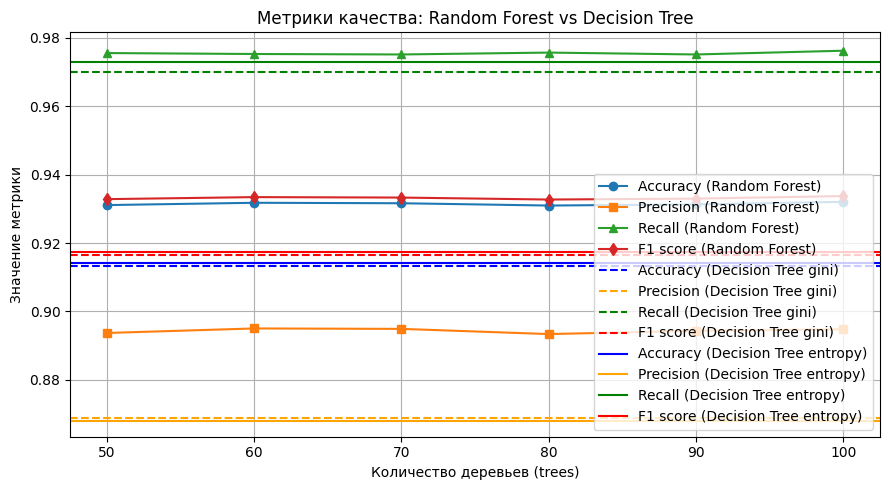

In [41]:
# Метрики случайного дерева
plt.figure(figsize=(9, 5))
plt.plot(results['trees'], results['accuracy'], marker = 'o', label = 'Accuracy (Random Forest)')
plt.plot(results['trees'], results['precision'], marker = 's', label = 'Precision (Random Forest)')
plt.plot(results['trees'], results['recall'], marker = '^', label = 'Recall (Random Forest)')
plt.plot(results['trees'], results['f1'], marker = 'd', label = 'F1 score (Random Forest)')

# Метрики для одного дерева критерия gini
plt.axhline(y = 0.9134, color = 'blue', linestyle = '--', label = 'Accuracy (Decision Tree gini)')
plt.axhline(y = 0.8687, color = 'orange', linestyle = '--', label = 'Precision (Decision Tree gini)')
plt.axhline(y = 0.9701, color = 'green', linestyle = '--', label = 'Recall (Decision Tree gini)')
plt.axhline(y = 0.9166, color = 'red', linestyle = '--', label = 'F1 score (Decision Tree gini)')

# Метрики для одного дерева критерия entropy
plt.axhline(y = 0.9141, color = 'blue', linestyle = '-', label = 'Accuracy (Decision Tree entropy)')
plt.axhline(y = 0.8678, color = 'orange', linestyle = '-', label = 'Precision (Decision Tree entropy)')
plt.axhline(y = 0.9731, color = 'green', linestyle = '-', label = 'Recall (Decision Tree entropy)')
plt.axhline(y = 0.9174, color = 'red', linestyle = '-', label = 'F1 score (Decision Tree entropy)')

plt.title('Метрики качества: Random Forest vs Decision Tree')
plt.xlabel('Количество деревьев (trees)')
plt.ylabel('Значение метрики')
plt.xticks(results['trees'])
plt.grid(True)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


На графике видно, что случайный лес отлично справился с задачей классификации. Однако, задача была выполнена хорошо уже на количестве в 50 деревьев. Увеличение количества деревьев не приносит пользы, но переобучения не случается, так как метрики остаются в своих пределах.

Также можно сравнить работу случайного леса с деревом решений из предыдущей работы. Он лучше справляется, чем одно дерево решений. Его значения метрик выше и стабильнее, а значит модель обучена лучше, поэтому эффективность леса больше, чем у дерева решений.